# Scraping and Clustering Toronto with Python
# Part 3 - Clustering Neighborhoods

## Introduction

In this Part 3 of 3 of the series, we will explore the Toronto neighborhoods using Foursquare API, group the neighborhoods into clusters using k-means clustering algorithm, and them visualize them in a map using the Folium library.

### Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np

import requests
import json

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans
import folium

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Load the dataframe

In [3]:
df_toronto = pd.read_csv('toronto2.csv', index_col = 0)
df_toronto

,PostalCode,Borough,Neighborhood,Latitude,Longitude
M3A,M3A,North York,Parkwoods,43.758800,-79.320197
M4A,M4A,North York,Victoria Village,43.732658,-79.311189
M5A,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.660706,-79.360457
M6A,M6A,North York,"Lawrence Manor, Lawrence Heights",43.722079,-79.437507
M7A,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.659659,-79.390340
M9A,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.679484,-79.538909
M1B,M1B,Scarborough,"Malvern, Rouge",43.809196,-79.221701
M3B,M3B,North York,Don Mills,43.775347,-79.345944
M4B,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706298,-79.321907
M5B,M5B,Downtown Toronto,"Garden District, Ryerson",43.656500,-79.377114


Calculate the central coordinates to be used in map.

In [4]:
toronto_latitude = df_toronto['Latitude'].mean()
toronto_longitude = df_toronto['Longitude'].mean()

In [5]:
map_toronto = folium.Map(location = [toronto_latitude, toronto_longitude], zoom_start = 11)

for lat, lng, borough, neighborhood in zip(df_toronto['Latitude'], df_toronto['Longitude'], df_toronto['Borough'], df_toronto['Neighborhood']):
    label = '{} ({})'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html = True)
    
    folium.CircleMarker(
        [lat, lng],
        radius = 5,
        popup = label,
        color = 'blue',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [6]:
toronto_data = df_toronto.reset_index(drop = True)
toronto_data.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.758800,-79.320197
1,M4A,North York,Victoria Village,43.732658,-79.311189
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.660706,-79.360457
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.722079,-79.437507
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.659659,-79.390340


## Retrieve nearby venues using Foursquare API

In [ ]:
# Info to be asked at runtime
CLIENT_ID = input('Your client ID: ')
CLIENT_SECRET = input('Your client secret: ')

VERSION = '20180605'
radius = 500
LIMIT = 100

Test the Foursquare API by exploring venues near the central coordinates.

In [8]:
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, toronto_latitude, toronto_longitude, radius, LIMIT)

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f295cba9675546b5d3fef85'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Davisville',
  'headerFullLocation': 'Davisville, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 50,
  'suggestedBounds': {'ne': {'lat': 43.706552568092235,
    'lng': -79.38637398580555},
   'sw': {'lat': 43.69755255909223, 'lng': -79.39879987895004}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b801467f964a5203e5030e3',
       'name': 'June Rowlands Park',
       'location': {'address': '220 Davisville Ave',
        'crossStreet': 'btwn Mt Pleasant Rd & Acacia Rd',
        'lat': 43.70051698238234,
        'lng': -79.38918866607341,
   

A function that extracts venue category

In [9]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [10]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = pd.json_normalize(venues)

# Filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues = nearby_venues.loc[:, filtered_columns]

# Filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# Clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,June Rowlands Park,Park,43.700517,-79.389189
1,Balsamico,Italian Restaurant,43.701505,-79.397162
2,Little Sister,Indonesian Restaurant,43.701552,-79.397163
3,Jules Cafe Patisserie,Dessert Shop,43.704138,-79.388413
4,Thobors Boulangerie Patisserie Café,Café,43.704514,-79.388616


A function to retrieve nearby venues given a single coordinates.

In [11]:
def getNearbyVenues(lat, lng, radius = 500):
    # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        return results

A function to retrieve nearby venues given a set of coordinates.

In [12]:
def getAllNearbyVenues(postalcodes, names, latitudes, longitudes, radius = 500):
    venues_list = []
    
    for postalcode, name, lat, lng in zip(postalcodes, names, latitudes, longitudes):
        results = getNearbyVenues(lat, lng, radius)
        
        # if no venue is found, increase the radius and search again
        if len(results) == 0:
            results = getNearbyVenues(lat, lng, radius * 1.5)
        
        print('{} - {} venues found nearby'.format(name, len(results)))
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            postalcode,
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['PostalCode', 'Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Retrieve nearby venues given the coordinates of Toronto neighborhoods.

In [13]:
toronto_venues = getAllNearbyVenues(postalcodes = toronto_data['PostalCode'], names = toronto_data['Neighborhood'],
                                   latitudes = toronto_data['Latitude'],
                                   longitudes = toronto_data['Longitude']
                                  )

Parkwoods - 12 venues found nearby
Victoria Village - 5 venues found nearby
Regent Park, Harbourfront - 22 venues found nearby
Lawrence Manor, Lawrence Heights - 5 venues found nearby
Queen's Park, Ontario Provincial Government - 74 venues found nearby
Islington Avenue, Humber Valley Village - 4 venues found nearby
Malvern, Rouge - 13 venues found nearby
Don Mills - 65 venues found nearby
Parkview Hill, Woodbine Gardens - 8 venues found nearby
Garden District, Ryerson - 65 venues found nearby
Glencairn - 5 venues found nearby
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale - 4 venues found nearby
Rouge Hill, Port Union, Highland Creek - 2 venues found nearby
Don Mills - 65 venues found nearby
Woodbine Heights - 8 venues found nearby
St. James Town - 31 venues found nearby
Humewood-Cedarvale - 9 venues found nearby
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood - 1 venues found nearby
Guildwood, Morningside, West Hill - 4 venues found nearby
The Bea

In [14]:
toronto_venues.head()

,PostalCode,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,M3A,Parkwoods,43.7588,-79.320197,Allwyn's Bakery,43.759840,-79.324719,Caribbean Restaurant
1,M3A,Parkwoods,43.7588,-79.320197,LCBO,43.757774,-79.314257,Liquor Store
2,M3A,Parkwoods,43.7588,-79.320197,Shoppers Drug Mart,43.760857,-79.324961,Pharmacy
3,M3A,Parkwoods,43.7588,-79.320197,Petro-Canada,43.757950,-79.315187,Gas Station
4,M3A,Parkwoods,43.7588,-79.320197,Pizza Pizza,43.760231,-79.325666,Pizza Place


In [15]:
toronto_venues.shape

(3453, 8)

Save the venues into a CSV file.

In [16]:
toronto_venues.to_csv('toronto_venues.csv')

## Data wrangling with Toronto neighborhoods

Show the number of venues returned for each neighborhood.

In [17]:
toronto_venues.groupby('Neighborhood').count()

,PostalCode,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,,
Agincourt,12,12,12,12,12,12,12
"Alderwood, Long Branch",8,8,8,8,8,8,8
"Bathurst Manor, Wilson Heights, Downsview North",66,66,66,66,66,66,66
Bayview Village,12,12,12,12,12,12,12
"Bedford Park, Lawrence Manor East",1,1,1,1,1,1,1
Berczy Park,100,100,100,100,100,100,100
"Birch Cliff, Cliffside West",4,4,4,4,4,4,4
"Brockton, Parkdale Village, Exhibition Place",18,18,18,18,18,18,18
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",59,59,59,59,59,59,59


In [18]:
print('There are {} unique venue categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 292 unique venue categories.


Show the neighborhoods with venue categories of each.

In [19]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix = "", prefix_sep = "")

# add neighborhood column back to dataframe
toronto_onehot['PostalCode'] = toronto_venues['PostalCode']
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood']

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,PostalCode,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Terminal,American Restaurant,Animal Shelter,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Costume Shop,Creperie,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Distribution Center,Dive Bar,Doctor's Office,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food & Drink Shop,Food Court,Food Service,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,History Museum,Hobby Shop,Home Service,Hong Kong Restaurant,Hospital,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Lake,Laser Tag,Latin American Restaurant,Laundromat,Laundry Service,Leather Goods Store,Library,Lingerie Store,Liquor Store,Lounge,Luggage Store,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Supply Store,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Poutine Place,Print Shop,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Rock Climbing Spot,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,South American Restaurant,Souvlaki Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Storage Facility,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,T

In [20]:
toronto_onehot.shape

(3453, 293)

Group rows by neighborhood and take the mean of the frequency of occurrence in each category.

In [21]:
toronto_grouped = toronto_onehot.groupby('PostalCode').mean().reset_index()
toronto_grouped

,PostalCode,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Terminal,American Restaurant,Animal Shelter,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Costume Shop,Creperie,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Distribution Center,Dive Bar,Doctor's Office,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food & Drink Shop,Food Court,Food Service,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,History Museum,Hobby Shop,Home Service,Hong Kong Restaurant,Hospital,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Lake,Laser Tag,Latin American Restaurant,Laundromat,Laundry Service,Leather Goods Store,Library,Lingerie Store,Liquor Store,Lounge,Luggage Store,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Supply Store,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Poutine Place,Print Shop,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Rock Climbing Spot,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,South American Restaurant,Souvlaki Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Storage Facility,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Track,Trail,Tr

In [22]:
toronto_grouped.shape

(103, 292)

Show each neighborhood with 5 most common venues.

In [23]:
num_top_venues = 5

for hood in toronto_grouped['PostalCode']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['PostalCode'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----M1B----
                  venue  freq
0  Fast Food Restaurant  0.23
1           Pizza Place  0.15
2              Pharmacy  0.15
3         Grocery Store  0.08
4          Skating Rink  0.08


----M1C----
                     venue  freq
0                 Bus Line   0.5
1            Train Station   0.5
2               Nail Salon   0.0
3                   Office   0.0
4  North Indian Restaurant   0.0


----M1E----
              venue  freq
0     Train Station  0.50
1    Baseball Field  0.25
2  Storage Facility  0.25
3               ATM  0.00
4       Music Venue  0.00


----M1G----
                  venue  freq
0  Fast Food Restaurant  0.18
1                  Bank  0.09
2           Coffee Shop  0.09
3        Discount Store  0.09
4        Sandwich Place  0.05


----M1H----
                  venue  freq
0  Fast Food Restaurant  0.11
1           Coffee Shop  0.07
2         Grocery Store  0.07
3        Hardware Store  0.04
4        Clothing Store  0.04


----M1J----
                venue  f

4  Japanese Restaurant  0.03


----M5C----
                venue  freq
0         Coffee Shop  0.13
1         Pizza Place  0.10
2       Grocery Store  0.06
3  Italian Restaurant  0.06
4                Café  0.06


----M5E----
                venue  freq
0         Coffee Shop  0.08
1          Restaurant  0.06
2                Café  0.06
3  Italian Restaurant  0.05
4               Hotel  0.04


----M5G----
            venue  freq
0     Coffee Shop  0.14
1  Clothing Store  0.09
2           Plaza  0.04
3           Hotel  0.04
4  Sandwich Place  0.02


----M5H----
                           venue  freq
0                    Coffee Shop  0.06
1                Thai Restaurant  0.03
2                 Cosmetics Shop  0.03
3  Vegetarian / Vegan Restaurant  0.03
4                            Bar  0.03


----M5J----
         venue  freq
0  Coffee Shop  0.13
1         Café  0.05
2   Restaurant  0.04
3        Hotel  0.04
4  Pizza Place  0.03


----M5K----
                 venue  freq
0          Coffee 

A function to sort venues in descending order.

In [24]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending = False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Show each neighborhood with 10 most common venue categories.

In [25]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['PostalCode']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind + 1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind + 1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns = columns)
neighborhoods_venues_sorted['PostalCode'] = toronto_grouped['PostalCode']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.tail(10)

,PostalCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
93,M9A,Smoothie Shop,Sandwich Place,Food Service,Coffee Shop,Egyptian Restaurant,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant
94,M9B,Electronics Store,Park,Convenience Store,Skating Rink,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant
95,M9C,Park,Yoga Studio,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store
96,M9L,Furniture / Home Store,Pharmacy,Shopping Mall,Park,Bakery,Yoga Studio,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant
97,M9M,Baseball Field,Convenience Store,Gas Station,Yoga Studio,Electronics Store,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant
98,M9N,Train Station,Coffee Shop,Discount Store,Pharmacy,Skating Rink,Fried Chicken Joint,Laundromat,Café,Sandwich Place,Bank
99,M9P,Pizza Place,Gas Station,Park,Yoga Studio,Egyptian Restaurant,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant
100,M9R,Park,Yoga Studio,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store
101,M9V,Playground,Yoga Studio,Electronics Store,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Ethiopian Restaurant
102,M9W,Clothing Store,Coffee Shop,Plaza,Hotel,Sushi Restaurant,Cosmetics Shop,Bar,Office,Theater,Steakhouse


## Cluster the neighborhoods

Group the neighborhoods into 5 clusters using k-means algorithm.

In [26]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('PostalCode', 1)

# run k-means clustering
kmeans = KMeans(n_clusters = kclusters, random_state = 0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 3, 3, 3, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 3, 1,
       1, 1, 1, 0, 1, 1, 3, 0, 3, 3, 1, 3, 0, 2, 1])

Show each neighborhood completed with neighborhood details and 10 most common venue categories.

In [27]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = toronto_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('PostalCode'), on = 'PostalCode', how = 'inner')

toronto_merged['Cluster Labels'].astype(int) # This column might have been casted to float upon joining the dataframes
toronto_merged.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.758800,-79.320197,1,Pharmacy,Pizza Place,Convenience Store,Bank,Laundry Service,Caribbean Restaurant,Discount Store,Coffee Shop,Gas Station,Shopping Mall
1,M4A,North York,Victoria Village,43.732658,-79.311189,1,Spa,Mediterranean Restaurant,Bus Line,Thai Restaurant,Middle Eastern Restaurant,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.660706,-79.360457,1,Coffee Shop,Thai Restaurant,Pet Store,Beer Store,Food Truck,Restaurant,Auto Dealership,Pub,Grocery Store,Pharmacy
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.722079,-79.437507,3,Electronics Store,Doctor's Office,Kids Store,Park,Bank,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant,Fast Food Restaurant
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.659659,-79.390340,1,Coffee Shop,Café,Sandwich Place,Italian Restaurant,Japanese Restaurant,Thai Restaurant,Bubble Tea Shop,French Restaurant,Chinese Restaurant,Korean Restaurant


In [28]:
toronto_merged.shape

(103, 16)

Sort the neighborhoods by cluster and postal code.

In [29]:
toronto_merged.sort_values(by = ['Cluster Labels', 'PostalCode'], inplace = True)

Show how the neighborhoods are distributed across clusters.

In [30]:
toronto_merged['Cluster Labels'].value_counts(sort = False)

0     6
1    74
2     2
3    20
4     1
Name: Cluster Labels, dtype: int64

In [31]:
df_clusters = pd.DataFrame(toronto_merged['Cluster Labels'].value_counts(sort = False))
df_clusters.index.name = 'Cluster'
df_clusters.columns = ['Count']
df_clusters

,Count
Cluster,
0,6
1,74
2,2
3,20
4,1


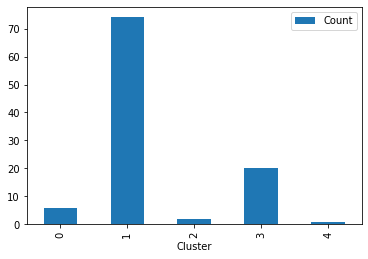

In [32]:
df_clusters.plot.bar()

## Visualize the clusters

In [33]:
# create map
map_clusters = folium.Map(location = [toronto_latitude, toronto_longitude], zoom_start = 11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []

for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html = True)
    
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Interpret the clusters

A sample of 5 neighborhoods are shown for each cluster. Then we try to explore the nature of the neighborhood based on its most common venues.

**Interpreting Cluster 0 - The Nature**

In [34]:
toronto_merged[toronto_merged['Cluster Labels'] == 0].sample(5, replace = True)

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
95,M1X,Scarborough,Upper Rouge,43.804930,-79.165837,0,Fast Food Restaurant,Park,Yoga Studio,Egyptian Restaurant,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store
17,M9C,Etobicoke,"Eringate, Bloordale Gardens, Old Burnhamthorpe...",43.662273,-79.576516,0,Park,Yoga Studio,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store
34,M3J,North York,"Northwood Park, York University",43.754135,-79.504480,0,Park,Middle Eastern Restaurant,Baseball Field,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Ethiopian Restaurant
77,M9R,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ...",43.699539,-79.556346,0,Park,Yoga Studio,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store
82,M1T,Scarborough,"Clarks Corners, Tam O'Shanter, Sullivan",43.796409,-79.297795,0,Park,Gas Station,Yoga Studio,Egyptian Restaurant,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store


**Interpreting Cluster 1 - Food & Beverages**

In [35]:
toronto_merged[toronto_merged['Cluster Labels'] == 1].sample(5, replace = True)

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
99,M4Y,Downtown Toronto,Church and Wellesley,43.665524,-79.383801,1,Coffee Shop,Japanese Restaurant,Sushi Restaurant,Gay Bar,Restaurant,Café,Hotel,Mediterranean Restaurant,Men's Store,Diner
39,M2K,North York,Bayview Village,43.769197,-79.376662,1,Bank,Fish Market,Outdoor Supply Store,Pizza Place,Breakfast Spot,Sporting Goods Shop,Bubble Tea Shop,Gas Station,Sandwich Place,Fast Food Restaurant
31,M6H,West Toronto,"Dufferin, Dovercourt Village",43.660202,-79.435719,1,Bar,Bakery,Coffee Shop,Vietnamese Restaurant,Restaurant,Beer Store,Sandwich Place,Café,Mexican Restaurant,Cocktail Bar
62,M5N,Central Toronto,Roselawn,43.710541,-79.401138,1,Coffee Shop,Restaurant,Fast Food Restaurant,Italian Restaurant,Diner,Salad Place,Café,Mexican Restaurant,Yoga Studio,Pizza Place
27,M2H,North York,Hillcrest Village,43.681695,-79.425712,1,Italian Restaurant,Café,Indian Restaurant,Burger Joint,Coffee Shop,Mexican Restaurant,Sushi Restaurant,Fish & Chips Shop,Bakery,Restaurant


**Interpreting Cluster 2 - Lifestyle**

In [36]:
toronto_merged[toronto_merged['Cluster Labels'] == 2].sample(5, replace = True)

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
89,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest...",43.816178,-79.314538,2,Playground,Yoga Studio,Electronics Store,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Ethiopian Restaurant
89,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest...",43.816178,-79.314538,2,Playground,Yoga Studio,Electronics Store,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Ethiopian Restaurant
89,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest...",43.816178,-79.314538,2,Playground,Yoga Studio,Electronics Store,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Ethiopian Restaurant
89,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest...",43.816178,-79.314538,2,Playground,Yoga Studio,Electronics Store,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Ethiopian Restaurant
89,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest...",43.816178,-79.314538,2,Playground,Yoga Studio,Electronics Store,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Ethiopian Restaurant


**Interpreting Cluster 3 - Commercial**

In [37]:
toronto_merged[toronto_merged['Cluster Labels'] == 3].sample(5, replace = True)

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
56,M6M,York,"Del Ray, Mount Dennis, Keelsdale and Silverthorn",43.689619,-79.479188,3,Discount Store,Grocery Store,Wine Shop,Sandwich Place,Convenience Store,Coffee Shop,Park,Gas Station,Restaurant,Dive Bar
50,M9L,North York,Humber Summit,43.760078,-79.571760,3,Furniture / Home Store,Pharmacy,Shopping Mall,Park,Bakery,Yoga Studio,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant
69,M6P,West Toronto,"High Park, The Junction South",43.653867,-79.466864,3,Convenience Store,Pet Store,Pub,Sandwich Place,Shipping Store,Food Truck,Gym,Gym / Fitness Center,Mexican Restaurant,Sporting Goods Shop
11,M9B,Etobicoke,"West Deane Park, Princess Gardens, Martin Grov...",43.663199,-79.568568,3,Electronics Store,Park,Convenience Store,Skating Rink,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant
14,M4C,East York,Woodbine Heights,43.699920,-79.319279,3,Skating Rink,ATM,Pharmacy,Bus Stop,Athletics & Sports,Park,Dance Studio,Doner Restaurant,Donut Shop,Dumpling Restaurant


**Interpreting Cluster 4 - Physical Exercise**

In [38]:
toronto_merged[toronto_merged['Cluster Labels'] == 4].sample(5, replace = True)

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
55,M5M,North York,"Bedford Park, Lawrence Manor East",43.737388,-79.410925,4,Gym / Fitness Center,Yoga Studio,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store
55,M5M,North York,"Bedford Park, Lawrence Manor East",43.737388,-79.410925,4,Gym / Fitness Center,Yoga Studio,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store
55,M5M,North York,"Bedford Park, Lawrence Manor East",43.737388,-79.410925,4,Gym / Fitness Center,Yoga Studio,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store
55,M5M,North York,"Bedford Park, Lawrence Manor East",43.737388,-79.410925,4,Gym / Fitness Center,Yoga Studio,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store
55,M5M,North York,"Bedford Park, Lawrence Manor East",43.737388,-79.410925,4,Gym / Fitness Center,Yoga Studio,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store


Save the final dataframe into a CSV file.

In [39]:
toronto_merged.to_csv('toronto3.csv')